# L05c - Classificador centroid mais próximo


## Implementation from sklearn

In [103]:
from sklearn.neighbors import NearestCentroid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [92]:
X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])

In [93]:
cn_model = NearestCentroid(metric='euclidean')
cn_model.fit(X_train, y_train)

cn_model.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

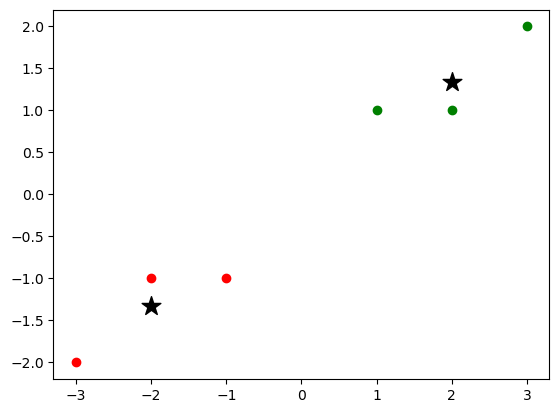

In [94]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

In [95]:
y_pred = cn_model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


In [96]:
accuracy_score(y_test, y_pred)

1.0

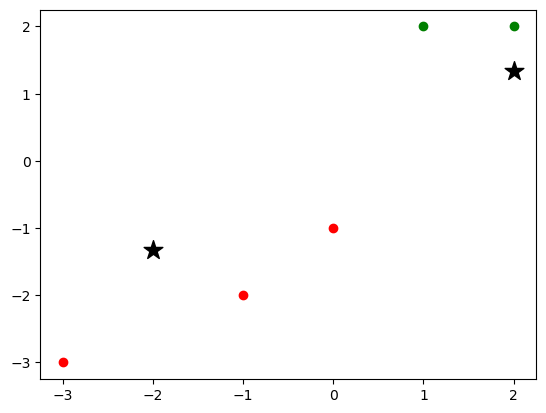

In [97]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

## Implementation from scratch

Criando as funções fit(), predict() e score() para a classe NearestCentroidScratch

In [115]:
class NearestCentroidScratch():
    def __init__(self, metric='eucledian'):
        self.metric = metric
        self.centroids_ = np.array([])
        self.classes_ = np.array([])
  
    # Ajusta o modelo de acordo com os dados de treinamento fornecidos
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.centroids_ = np.empty((0, len(self.classes_)))
        for i in self.classes_:
            c = np.mean(X[y == i], axis = 0)
            self.centroids_ = np.vstack((self.centroids_, c))

    # Executa a classificação sobre os dados de teste
    # Para cada amostra de teste é retornada a classe prevista
    def predict(self, X):
        res = np.array([])
        for t_i in X:
            label = np.sqrt(np.sum((t_i - self.centroids_)**2, axis = 1))
            pred = self.classes_[np.where(label == np.min(label))[0][0]]
            res = np.append(res, pred)
        return res.astype(int)
    
    # Retorna a acurácia média nos dados e classes de teste fornecidos
    def score(self, y, y_pred):
        return np.sum(y == y_pred) / len(y)

Definindo os dados e classes de treino e teste

In [117]:
# X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# y_train = np.array([1, 1, 1, 2, 2, 2])

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])

Realizando o treinamento dos dados

In [110]:
clf = NearestCentroidScratch()

clf.fit(X_train, y_train)
clf.centroids_

[-2.         -1.33333333]
[2.         1.33333333]


array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

Realizando a previsão das classes de teste

In [114]:
# X_test = np.array([[-1, -1]])
# y_test = np.array([1])

y_pred = clf.predict(X_test)

print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


Verificando a acurácia entre as classes de teste e classes previstas

In [102]:
clf.score(y_test, y_pred)

1.0